Dataset Preview:
   Operating_hours  Output
0                3       5
1                5       8
2                9       8
3                7       7
4               11       9

Predictor Variables: ['Operating_hours']
Dependent Variable: Output


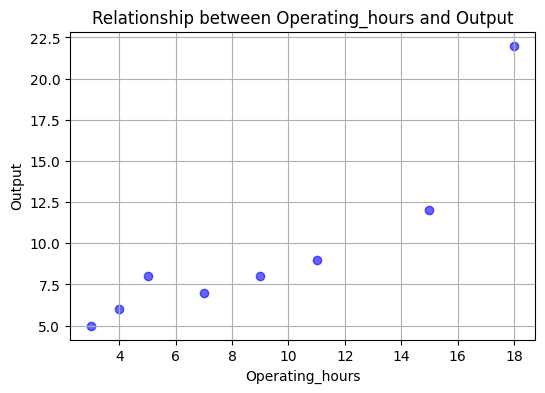

Epoch 1: Weights = [0.09625 1.09375], Error = 118.3750
Epoch 2: Weights = [0.0931     1.01672812], Error = 6.2743

Prediction for 13 hours of operation: 13.3106
Mean Squared Error of the model: 5.7205

Scikit-learn Prediction for 13 hours of operation: 13.2290
Scikit-learn Coefficients: Intercept = 1.5160891089108919, Slope = 0.9009900990099009


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
file_path = 'Machine.csv'
data = pd.read_csv(file_path)

# Display predictor and dependent variables
print("Dataset Preview:")
print(data.head())

predictors = data.columns[:-1]
dependent = data.columns[-1]

print("\nPredictor Variables:", predictors.tolist())
print("Dependent Variable:", dependent)

# Step 2: Visualize relationships between predictors and dependent variable
for predictor in predictors:
    plt.figure(figsize=(6, 4))
    plt.scatter(data[predictor], data[dependent], color='blue', alpha=0.6)
    plt.title(f"Relationship between {predictor} and {dependent}")
    plt.xlabel(predictor)
    plt.ylabel(dependent)
    plt.grid()
    plt.show()

# Step 3: Implement Gradient Descent for Linear Regression

def gradient_descent(X, y, learning_rate=0.01, epochs=2):
    n = len(y)
    X = np.c_[np.ones((n, 1)), X]  # Add intercept term
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        predictions = X.dot(weights)
        errors = predictions - y
        gradients = (1 / n) * X.T.dot(errors)
        weights -= learning_rate * gradients
        print(f"Epoch {epoch + 1}: Weights = {weights}, Error = {np.mean(errors**2):.4f}")

    return weights

# Prepare data for training
X = data[predictors].values.flatten().reshape(-1, 1)  # Assuming a single predictor for simplicity
y = data[dependent].values

# Train using Gradient Descent
learning_rate = 0.01
epochs = 2
weights = gradient_descent(X, y, learning_rate, epochs)

# Predict output for 13 hours
X_new = np.array([[13]])  # 13 hours
X_new_with_intercept = np.c_[np.ones((1, 1)), X_new]
prediction = X_new_with_intercept.dot(weights)
print(f"\nPrediction for 13 hours of operation: {prediction[0]:.4f}")

# Calculate training error
final_predictions = np.c_[np.ones((len(X), 1)), X].dot(weights)
mse = mean_squared_error(y, final_predictions)
print(f"Mean Squared Error of the model: {mse:.4f}")

# Step 4: Verify with Scikit-learn Linear Regression
model = LinearRegression()
model.fit(X, y)
sklearn_prediction = model.predict(X_new)
print(f"\nScikit-learn Prediction for 13 hours of operation: {sklearn_prediction[0]:.4f}")
print(f"Scikit-learn Coefficients: Intercept = {model.intercept_}, Slope = {model.coef_[0]}")


Dataset Preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

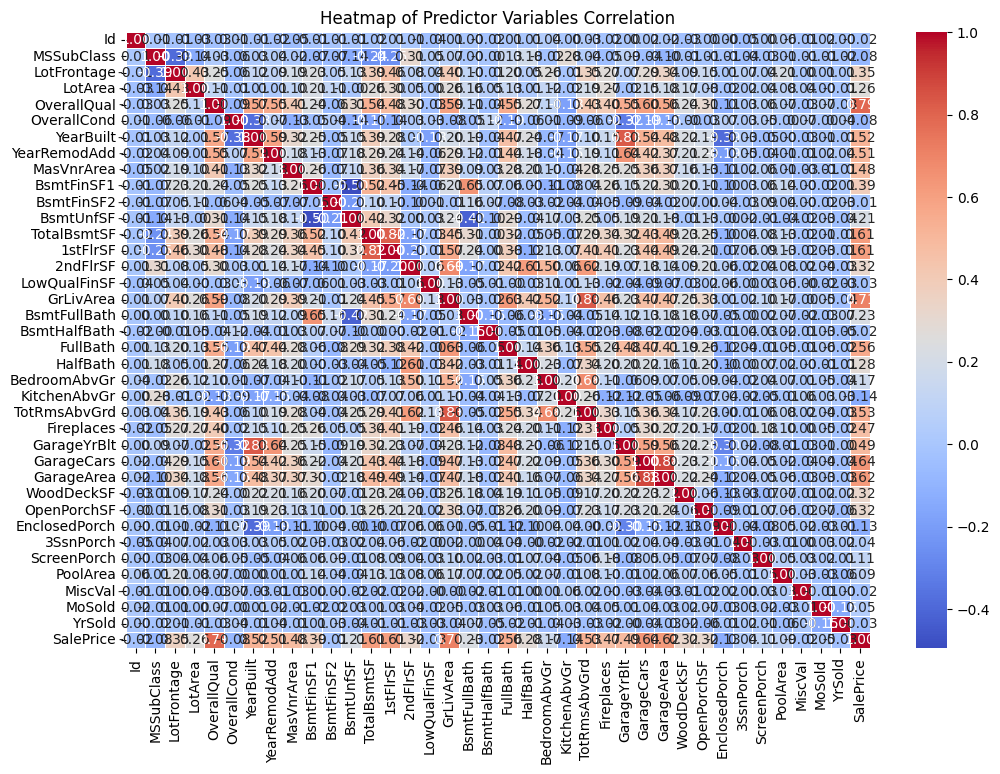

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'housePrice.csv'
house_data = pd.read_csv(file_path)

# Step 2: Display dataset preview
print("Dataset Preview:")
print(house_data.head())

# Step 3: Handle non-numeric data
# Convert non-numeric columns to numeric if possible, drop them otherwise
numeric_data = house_data.select_dtypes(include=['number'])

# Step 4: Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 5: Visualize the collinearity/multicollinearity with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Predictor Variables Correlation")
plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from typing import Optional, Tuple, List


def evaluate_logistic_regression(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    y_train: pd.Series,
    y_test: pd.Series,
    solver: str,
    max_iter: int,
    random_state: Optional[int],
) -> Tuple[Optional[float], Optional[str]]:
    """
    Trains and evaluates a Logistic Regression model.
    """
    try:
        model = LogisticRegression(solver=solver, max_iter=max_iter, random_state=random_state)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        return accuracy, classification_report(y_test, predictions)
    except Exception as e:
        return None, str(e)


def load_and_split_dataset(
    path: str, target_column: str, test_size: float = 0.2, random_state: int = 42
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Loads a dataset, splits it into train and test sets.
    """
    data = pd.read_csv(path)
    X = data.drop(columns=[target_column], errors='ignore')  # Drop target column
    y = data[target_column]  # Target column
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def evaluate_multiple_configurations(
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    y_train: pd.Series,
    y_test: pd.Series,
    solvers: List[str],
    max_iters: List[int],
    random_states: List[Optional[int]],
    dataset_name: str,
) -> None:
    """
    Evaluates Logistic Regression models with multiple configurations.
    """
    print(f"\n--- {dataset_name} Results ---")
    for solver in solvers:
        for max_iter in max_iters:
            for random_state in random_states:
                X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=random_state)
                accuracy, report = evaluate_logistic_regression(
                    X_train_shuffled, X_test, y_train_shuffled, y_test, solver, max_iter, random_state
                )
                print(f"\nSolver: {solver}, Max Iter: {max_iter}, Random State: {random_state}")
                if accuracy is not None:
                    print(f"Accuracy: {accuracy:.4f}")
                    print(report)
                else:
                    print(f"Error: {report}")


# File paths and configurations
iris_data_path = 'Iris.csv'  # Adjust as needed
heart_data_path = 'heart.csv'  # Adjust as needed
solvers = ['lbfgs', 'liblinear', 'saga']
max_iters = [100, 200, 300]
random_states = [None, 42, 7]

# Load datasets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = load_and_split_dataset(iris_data_path, target_column='Species')
X_train_heart, X_test_heart, y_train_heart, y_test_heart = load_and_split_dataset(heart_data_path, target_column='HeartDisease')

# Evaluate configurations
evaluate_multiple_configurations(X_train_iris, X_test_iris, y_train_iris, y_test_iris, solvers, max_iters, random_states, "IRIS Classification")
evaluate_multiple_configurations(X_train_heart, X_test_heart, y_train_heart, y_test_heart, solvers, max_iters, random_states, "Heart Disease Prediction")



--- IRIS Classification Results ---

Solver: lbfgs, Max Iter: 100, Random State: None
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: lbfgs, Max Iter: 100, Random State: 42
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: lbfgs, Max Iter: 1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Solver: lbfgs, Max Iter: 200, Random State: 42
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: lbfgs, Max Iter: 200, Random State: 7
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: lbfgs, Max Iter: 300, Random State: None
Accuracy: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Solver: lbfgs, Max Iter: 300, Random State: 7
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: liblinear, Max Iter: 100, Random State: None
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: liblinear, Max Iter: 100, Random State: 42
Accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


Solver: saga, Max Iter: 100, Random State: 42
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: saga, Max Iter: 100, Random State: 7
Accuracy: 1.0000
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Solver: saga, Max Iter: 200, Random State: None
Accuracy: 1.0000
   